# Jury's stability criterion

In [90]:
import numpy as np
from sympy import *
import itertools
init_printing()
%matplotlib inline

In [107]:
def jury(a):
    n = len(a)
    tab = []
    for i in range(n):
        line1 = a[:n-i]
        line2 = line1[::-1]
        tab.append(line1)
        tab.append(line2)
        alpha = line1[-1]/line2[-1]
        a[:n-i] = line1-alpha*line2
    for line in tab:
        print line

def juryrec(a,tab):
    n = len(a)
    if n==1:
        tab.append(a)
    else:
        line1 = a
        line2 = line1[::-1]
        tab.append(line1)
        tab.append(line2)
        alpha = line1[-1]/line2[-1]
        aa = [el1 - alpha*el2 for (el1,el2) in itertools.izip(line1,line2)]
        juryrec(aa[:-1],tab)

        

In [67]:
aa1 = np.array([1,-2,1.4,-0.1])
aa2 = np.array([4,-4,-7,2])
a2 = [Integer(4),Integer(-4),Integer(-7),Integer(2)]

tab=[]
juryrec(a2, tab)
print "Coefficients"
print aa2
for line in tab:
    print line
np.roots(aa2)
tab=[]
juryrec(aa1, tab)
print "Coefficients"
print aa1
for line in tab:
    print line
print "Roots"
print np.roots(aa1)
print "Magnitudes"
print np.abs(np.roots(aa1))

Coefficients
[ 4 -4 -7  2]
[4, -4, -7, 2]
[2, -7, -4, 4]
[3, -1/2, -5]
[-5, -1/2, 3]
[-16/3, -4/3]
[-4/3, -16/3]
[-5]
Coefficients
[ 1.  -2.   1.4 -0.1]
[ 1.  -2.   1.4 -0.1]
[-0.1  1.4 -2.   1. ]
[0.98999999999999999, -1.8600000000000001, 1.2]
[1.2, -1.8600000000000001, 0.98999999999999999]
[-0.46454545454545459, 0.39454545454545475]
[0.39454545454545475, -0.46454545454545459]
[-0.12945205479452027]
Roots
[ 0.95986894+0.56970991j  0.95986894-0.56970991j  0.08026212+0.j        ]
Magnitudes
[ 1.11620687  1.11620687  0.08026212]


In [83]:
-0.4645+0.3945**2/0.4645

-0.12945102260495156

## Proportional control of second order system (DC-motor with zero-cancellation)
The transfer function is given by
\begin{equation} 
H(z) = \frac{1}{z^2 - 1.5z + 0.5} = \frac{B(z)}{A(z)}.
\end{equation}
The closed loop pulse-transfer function becomes
\begin{equation} 
H_c(z) = \frac{K H(z)}{KH(z) + 1} = \frac{K B(z)}{A(z) + KB(z)}.
\end{equation}
The characteristic equation of the closed loop system is thus
\begin{equation}
z^2  -1.5z + 0.5+K 
\end{equation}

[1, -1.5, K + 0.5]
[K + 0.5, -1.5, 1]
[-(K + 0.5)**2 + 1, 1.5*K - 0.75]
[1.5*K - 0.75, -(K + 0.5)**2 + 1]
[-(K + 0.5)**2 - (1.5*K - 0.75)**2/(-(K + 0.5)**2 + 1) + 1]
-(K + 0.5)**2 + 1
[-1.50000000000000, 0.500000000000000]
-1.0*K*(1.0*K**2 + 2.5*K - 1.5)/(1.0*K + 1.5)
[-3.00000000000000, 0.0, 0.500000000000000]


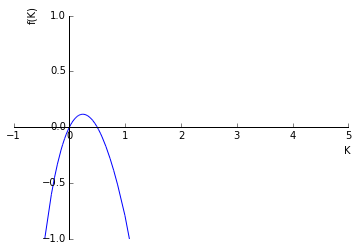

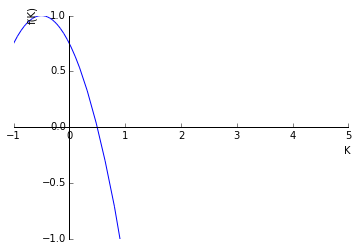

In [98]:
K = symbols('K')
a = [Integer(1), -1.5, 0.5+K]
tab=[]
juryrec(a,tab)
for line in tab:
    print line
crit1 = simplify(tab[2][0])
crit2 = simplify(tab[4][0])
print crit1
print solve(crit1, K)
print crit2
print solve(crit2, K)
plot(crit2, xlim=(-1.0, 5.0), ylim=(-1,1))
plot(crit1, xlim=(-1.0, 5.0), ylim=(-1,1))

## Proportional control of the normalized DC-motor
Zero-order hold sampling of the DC motor with transfer function $G(s)=\frac{1}{s(s+1)}$ gives the discrete time system
\begin{equation} H(z) = \frac{\big(h-1+e^{-h}\big)z + \big(1-e^{-h}-he^{-h}\big)}{z^2 -\big(1+e^{-h}\big)z + e^{-h}} \end{equation}

Let $h=\ln 2 \approx 0.693$. This gives the pulse-transfer function
\begin{equation} H(z) = \frac{B(z)}{A(z)} = \frac{0.19z + 0.15}{z^2 - 1.5z + 0.5} \end{equation}

Proportional control gives the closed loop system 
\begin{equation} 
H_c(z) = \frac{K H(z)}{KH(z) + 1} = \frac{K B(z)}{A(z) + KB(z)}.
\end{equation}
The characteristic equation of the closed loop system is
\begin{equation}
z^2 + (-1.5+0.19K)z + 0.5+0.15K 
\end{equation}



In [38]:
z,h = symbols('z,h')
eh = exp(-h)
H = ( (h-1+eh)*z + 1-eh-h*eh ) / (z**2 -(1+eh)*z + eh )
print H
H1 = H.subs(h,log(2))
print H1
H2 = N(H1)
print H2

(-h*exp(-h) + z*(h - 1 + exp(-h)) + 1 - exp(-h))/(z**2 - z*(1 + exp(-h)) + exp(-h))
(z*(-1/2 + log(2)) - log(2)/2 + 1/2)/(z**2 - 3*z/2 + 1/2)
(0.193147180559945*z + 0.153426409720027)/(z**2 - 1.5*z + 0.5)


### Apply Jury's criterion

In [75]:
K = symbols('K')
a = [Integer(1), -1.5+0.19*K, 0.5+0.15*K]
tab=[]
juryrec(a,tab)
for line in tab:
    print line


[1, 0.19*K - 1.5, 0.15*K + 0.5]
[0.15*K + 0.5, 0.19*K - 1.5, 1]
[-(0.15*K + 0.5)**2 + 1, 0.19*K - (0.15*K + 0.5)*(0.19*K - 1.5) - 1.5]
[0.19*K - (0.15*K + 0.5)*(0.19*K - 1.5) - 1.5, -(0.15*K + 0.5)**2 + 1]
[-(0.15*K + 0.5)**2 + 1 - (0.19*K - (0.15*K + 0.5)*(0.19*K - 1.5) - 1.5)**2/(-(0.15*K + 0.5)**2 + 1)]


In [84]:
print tab[2][0]
print solve(tab[2][0], K)
print solve(tab[4][0], K)
print N(tab[4][0].subs(K,3))
print N(tab[2][0].subs(K,3))

-(0.15*K + 0.5)**2 + 1
[-10.0000000000000, 3.33333333333333]
[0.0, 75.0000000000000]
0.0753230769230770
0.0975000000000000


In [77]:
from sympy.solvers.inequalities import solve_rational_inequalities
solve_rational_inequalities([[ ( (Poly(tab[2][0], K),Poly(tab[2][0], K)), '>=') ]])


(-oo, -10) U (-10, 10/3) U (10/3, oo)

## Proportional control of the double integrator
\begin{equation}
H(z) = \frac{B(z)}{A(z)} = \frac{h^2(z+1)}{2(z-1)^2} = \frac{h^2z + h^2}{2z^2 -4z + 2}
\end{equation}

Proportional control gives closed-loop system
\begin{equation}
H_c(z) = \frac{KH(z)}{1+KH(z)} = \frac{KB(z)}{A(z) + KB(z)} 
\end{equation}
with denominator polynomial
\begin{equation}
A(z) + KB(z) = 2z^2 +(-4+Kh^2)z + 2+Kh^2
\end{equation}


In [46]:
a = [Integer(2), -4+h**2*K, 2+h**2*K]
tab= []
juryrec(a,tab)
for line in tab:
    print line


[2, K*h**2 - 4, K*h**2 + 2]
[K*h**2 + 2, K*h**2 - 4, 2]
[-(K*h**2/2 + 1)*(K*h**2 + 2) + 2, K*h**2 - (K*h**2/2 + 1)*(K*h**2 - 4) - 4]
[K*h**2 - (K*h**2/2 + 1)*(K*h**2 - 4) - 4, -(K*h**2/2 + 1)*(K*h**2 + 2) + 2]
[-(K*h**2/2 + 1)*(K*h**2 + 2) + 2 - (K*h**2 - (K*h**2/2 + 1)*(K*h**2 - 4) - 4)**2/(-(K*h**2/2 + 1)*(K*h**2 + 2) + 2)]


In [47]:
line

[-(K*h**2/2 + 1)*(K*h**2 + 2) + 2 - (K*h**2 - (K*h**2/2 + 1)*(K*h**2 - 4) - 4)**2/(-(K*h**2/2 + 1)*(K*h**2 + 2) + 2)]

In [48]:
e3 = line[0].subs(h,1)
e3

-(K/2 + 1)*(K + 2) + 2 - (K - (K/2 + 1)*(K - 4) - 4)**2/(-(K/2 + 1)*(K + 2) + 2)

In [49]:
solve(e3,K)

[]

In [50]:
e1 = tab[2][0].subs(h,1)

In [51]:
solve(e1,K)

[-4, 0]

In [52]:
e1

-(K/2 + 1)*(K + 2) + 2

## PD control of the double integrator
The pulse-transfer function for the system obtained by zero-order hold sampling of $G(s)=\frac{1}{s^2}$: 
\begin{equation}
H(z) = \frac{B(z)}{A(z)} = \frac{h^2/2(z+1)}{(z-1)^2} = \frac{h^2}{2}\frac{z + 1}{z^2 -2z + 1}
\end{equation}

PD control (simple form) can be implemented using the filter
\begin{equation}
u(kh) = k_1 e(kh) + k_2 e(kh-h)
\end{equation}
with z-transform
\begin{equation}
R(z)U(z) = zU(z) = zk_1 E(z) + k_2 E(z) = S(z) E(z).
\end{equation}

This gives the closed loop system

\begin{equation}
H_c(z) = \frac{\frac{S(z)}{R(z)} \frac{B(z)}{A(z)} } {1 + \frac{S(z)}{R(z)} \frac{B(z)}{A(z)}} = \frac{S(z)B(z)}{R(z)A(z) + S(z)B(z)} 
\end{equation}
with denominator polynomial
\begin{equation}
R(z)A(z) + S(z)B(z) = z(z^2 -2z + 1) + h^2/2(k_1z + k_2)(z+1) = z^3 -2z^2 + z + h^2/2\big(k_1z^2 + (k_1+k_2)z + k_2\big) = z^3 + (h^2/2k_1 - 2)z^2 + (1 + h^2/2(k_1+k_2)z
\end{equation}


In [97]:
2/np.log(2)

2.8853900817779268

In [105]:
np.arccos(0.75)

0.72273424781341566

In [106]:
0.72/np.log(2)

1.0387404294400537

In [109]:
aa1 = np.array([9,-11.81,3.15])
tab=[]
juryrec(aa1, tab)
print "Coefficients"
print aa1
for line in tab:
    print line
np.roots(aa1)


Coefficients
[  9.   -11.81   3.15]
[  9.   -11.81   3.15]
[  3.15 -11.81   9.  ]
[7.8975, -7.6765000000000008]
[-7.6765000000000008, 7.8975]
[0.43581563786008104]


array([ 0.93980424,  0.37241798])

In [110]:
tab[2][1]/tab[2][0]

-0.97201646090534988